In [3]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='serif', serif='STIXGeneral', size=10)

def to_corr(x, ref):
    return (ref[0] - x) / (ref[0] - ref[1])
def to_corr_error(x, ref):
    return x / (ref[0] - ref[1])

In [4]:
f = h5py.File(f'{os.path.dirname(os.getcwd())}/data/raw/data_pub_h10.h5', 'a')

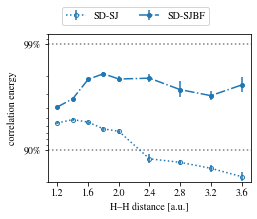

In [20]:
distances = np.array([1.2,1.4,1.6,1.8,2.0,2.4,2.8,3.2,3.6])
systems = [f'H10_d{di}' for di in distances]
ref_energies = np.array([f[system].attrs['ref_energy']for system in systems])
width = 3.63
fig, ax = plt.subplots(figsize= (width, width * 3/4))
for i in [0.01,0.1]:
    plt.axhline(i,ls=':',color='grey')

for i,ansatz in enumerate(['SD-SJ','SD-SJBF']):# 'MD-SJBF' #TODO add data to data_pub_h10.h5
    data = np.array([f[system][ansatz].attrs['energy'] for system in systems])
    data_corr = np.array([[to_corr(ei[0],ei_ref),to_corr_error(ei[1],ei_ref)] for ei,ei_ref in zip(data,ref_energies)])
    ax.errorbar(distances,1-data_corr[:,0],data_corr[:,1],label=ansatz,ls=[':','-.','-'][i],fillstyle=['none','full','full'][i],marker='o',ms='4',color='C0')

ax.legend(loc='center',bbox_to_anchor=(0.43,1.12),ncol=3)
ax.set_ylabel('correlation energy',labelpad=7)
ax.set_xlabel('H–H distance [a.u.]')
ax.set_xticks([1.2,1.6,2.0,2.4,2.8,3.2,3.6])
ax.set_yscale('log')
ax.set_ylim(0.2,0.008)
ax.set_yticks([1e-1, 1e-2])
ax.set_yticklabels(['90%', '99%'])
fig.subplots_adjust(hspace = 0.001 )
#plt.savefig("h10-dis-curve.pdf",bbox_inches='tight')